# Prepare Working Notebook


##### To do:
1. Inspect null values
2. Inspect column types
3. Inspect data types
4. Look for duplicates
5. Ensure data is tidy

In [1]:
# tab data
import pandas as pd
import numpy as np

# get data
from wrangle import get_zillow

In [2]:
# getting data
df = get_zillow()

In [3]:
# inspecting shape and size
df.shape, df.size

((52441, 5), 262205)

#### Nulls

In [4]:
# looking for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52441 entries, 0 to 52440
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    52441 non-null  float64
 1   bathroomcnt                   52441 non-null  float64
 2   calculatedfinishedsquarefeet  52359 non-null  float64
 3   taxvaluedollarcnt             52440 non-null  float64
 4   fips                          52441 non-null  float64
dtypes: float64(5)
memory usage: 2.4 MB


In [5]:
# looking at the nulls
df[df.calculatedfinishedsquarefeet.isna()]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,fips
124,0.0,0.0,NaN,830145.0,6059.0
3322,0.0,0.0,NaN,643406.0,6059.0
4465,2.0,1.0,NaN,488078.0,6059.0
4605,0.0,0.0,NaN,2909706.0,6059.0
5065,0.0,0.0,NaN,5080924.0,6059.0
...,...,...,...,...,...
46629,0.0,0.0,NaN,3489309.0,6037.0
48412,0.0,0.0,NaN,3248800.0,6059.0
48597,0.0,0.0,NaN,327761.0,6059.0
49690,0.0,0.0,NaN,321981.0,6059.0


In [6]:
# looking at other values where there are nulls 
df[df.calculatedfinishedsquarefeet.isna()].bedroomcnt.value_counts()

0.0    74
2.0     4
1.0     3
5.0     1
Name: bedroomcnt, dtype: int64

In [7]:
# a trend is seen
df[df.calculatedfinishedsquarefeet.isna()].bathroomcnt.value_counts()

0.0    74
1.0     6
1.5     1
4.5     1
Name: bathroomcnt, dtype: int64

In [8]:
df.calculatedfinishedsquarefeet.isna().sum()

82

#### Takeaways:
* There are some null values present with most of the nulls also having 0 or likely missing data in the other sections. There may be a few reasons for this but I will remove the data because there are only 82 nulls in the square feet

In [9]:
# removing the nulls associated with the square feet
df = df[df.calculatedfinishedsquarefeet.isna() == False]

In [10]:
# checking to see if other nulls were cleared
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52359 entries, 0 to 52440
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    52359 non-null  float64
 1   bathroomcnt                   52359 non-null  float64
 2   calculatedfinishedsquarefeet  52359 non-null  float64
 3   taxvaluedollarcnt             52358 non-null  float64
 4   fips                          52359 non-null  float64
dtypes: float64(5)
memory usage: 2.4 MB


In [11]:
# dropping the final null becasue it is only 1 value, not necessary for us in this case
df = df.dropna()

#### Duplicates

In [12]:
# Looking for duplicates
dupes = df[df.duplicated()]
dupes

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,fips
672,3.0,2.0,1316.0,205123.0,6037.0
835,3.0,2.0,1458.0,136104.0,6037.0
1196,2.0,1.0,1421.0,35606.0,6037.0
1381,4.0,3.0,2541.0,880456.0,6059.0
1796,3.0,2.0,1491.0,107110.0,6037.0
...,...,...,...,...,...
51429,6.0,4.0,3223.0,795000.0,6059.0
51499,3.0,2.0,1681.0,244000.0,6037.0
51777,4.0,3.0,1942.0,179912.0,6037.0
52298,3.0,1.0,1038.0,41163.0,6037.0


##### Takeaways:
* There are quitye a few duplicates. I will save the duplicated to a df called dupes and drop all other duplicates for time sake

In [13]:
# droppping duplicates
df = df.drop_duplicates()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52150 entries, 0 to 52440
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    52150 non-null  float64
 1   bathroomcnt                   52150 non-null  float64
 2   calculatedfinishedsquarefeet  52150 non-null  float64
 3   taxvaluedollarcnt             52150 non-null  float64
 4   fips                          52150 non-null  float64
dtypes: float64(5)
memory usage: 2.4 MB


#### Outliers

In [15]:
# looking into the descriptions fot the stats
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,fips
count,52150.000000,52150.000000,52150.000000,5.215000e+04,52150.000000
mean,3.306021,2.303682,1923.578715,5.284232e+05,6049.104660
std,0.940044,1.020129,1004.275896,7.490658e+05,21.017173
min,0.000000,0.000000,128.000000,1.000000e+03,6037.000000
25%,3.000000,2.000000,1268.000000,1.939808e+05,6037.000000
50%,3.000000,2.000000,1660.000000,3.734880e+05,6037.000000
75%,4.000000,3.000000,2307.000000,6.189395e+05,6059.000000
max,14.000000,18.000000,21929.000000,4.906124e+07,6111.000000


In [16]:
import matplotlib.pyplot as plt

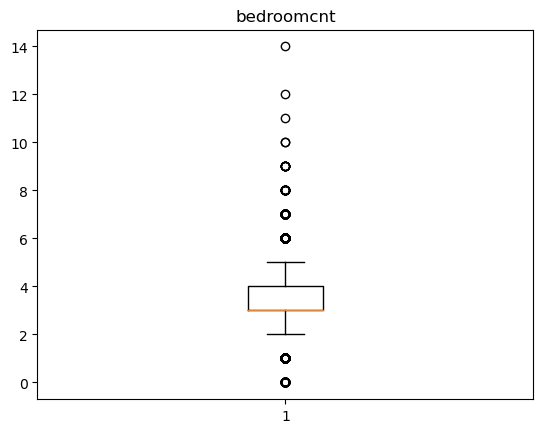

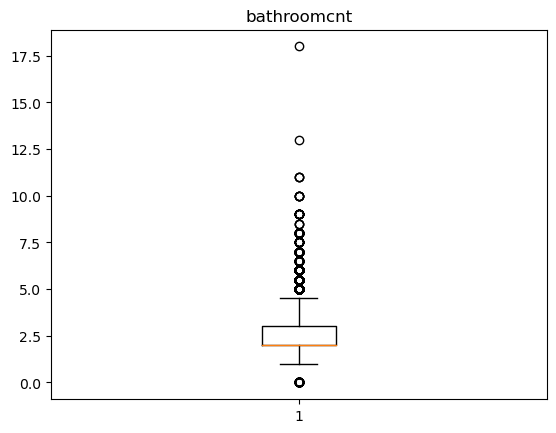

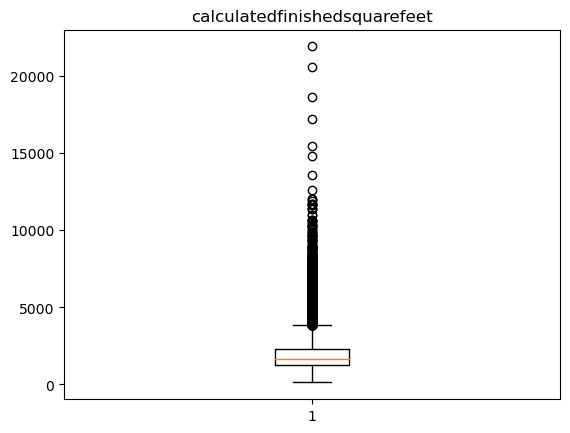

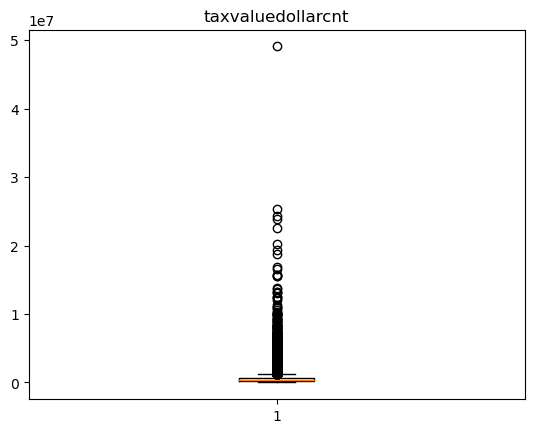

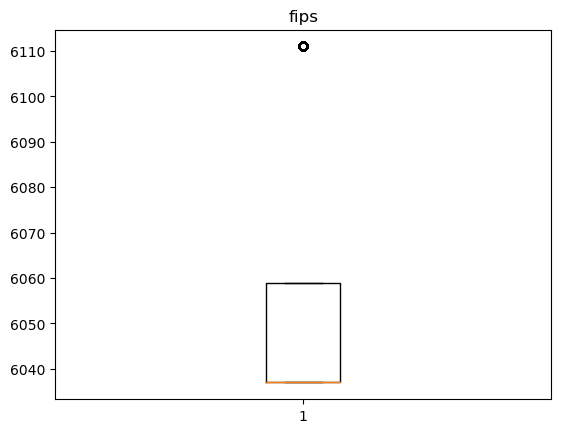

In [17]:
for col in df:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

##### Takeways:
* There look to be outliers in each column, quite a few

##### Actions: 
* I will use 1.5 iqr to separate the outliers
* for speed's sake, I will drop all outliers and return in the future to try to address them more
* for bathrooms and bedrooms, I will remove all baths and beds that are less than 1 

In [18]:
outlier_limits = {}

# for each column in df
for col in df:
    # set quartiles
    q1, q3 = df[col].quantile([.25, .75])

    # Set iqr 
    iqr = q3 - q1

    # add to dictionary with the upper limits and lower limits
    outlier_limits[col] =  {'low_limit_5': df[col].quantile(.05),
                            'low_limit': lambda x: q1 - 1.5 * iqr,
                  'up_limit': q3 + 1.5 * iqr
                 }

In [19]:
outlier_limits

{'bedroomcnt': {'low_limit_5': 2.0,
  'low_limit': <function __main__.<lambda>(x)>,
  'up_limit': 5.5},
 'bathroomcnt': {'low_limit_5': 1.0,
  'low_limit': <function __main__.<lambda>(x)>,
  'up_limit': 4.5},
 'calculatedfinishedsquarefeet': {'low_limit_5': 893.0,
  'low_limit': <function __main__.<lambda>(x)>,
  'up_limit': 3865.5},
 'taxvaluedollarcnt': {'low_limit_5': 61666.0,
  'low_limit': <function __main__.<lambda>(x)>,
  'up_limit': 1256377.625},
 'fips': {'low_limit_5': 6037.0,
  'low_limit': <function __main__.<lambda>(x)>,
  'up_limit': 6092.0}}

In [20]:
# mak a copy to explore outliers later
df_outliers = df.copy()

In [21]:
# for each cols
for col in df:

    # remove all observations that exceed upper limit
    df = df[(df[col] <= outlier_limits[col]['up_limit'])]

    # remove all observations that are below the lower limit
    df = df[(df[col] >= outlier_limits[col]['low_limit'])]

TypeError: '>=' not supported between instances of 'float' and 'function'

In [ ]:
# checking shape and outlier difference
df.shape, df_outliers.shape, df.shape[0] - df_outliers.shape[0]

#### Rename columns 

In [ ]:
# getting column names
df.columns

In [ ]:
# renaming columns
df = df.rename(columns={'bedroomcnt': 'beds',
                   'bathroomcnt': 'baths',
                   'calculatedfinishedsquarefeet': 'square_feet',
                   'taxvaluedollarcnt': 'tax_value'})

In [23]:
def clean_data(df, focus=True):
    '''
    Arguments: zillow df
    Actions:
        1. Removes outliers
            a. lower limit is Q1 - (1.5*IQR)
            b. upper limit is Q3 + (1.5*IQR)
        2. Drop nulls and duplicates
        3. Change column names
    Returns: cleaned df
    Modules:
        1. import scipy.stats as stats
        2. import pandas as pd
        3. import numpy as np
    '''
    
    # remove outliers
    # initialize dict
    outlier_limits = {}
    
    # for each column in df
    for col in df:
        
        if df[col].dtype != 'O':
            
            # set quartiles
            q1, q3 = df[col].quantile([.25, .75])

            # Set iqr 
            iqr = q3 - q1

            # add to dictionary with the upper limits and lower limits
            outlier_limits[col] =  {'low_limit_5': df[col].quantile(.05),
                                    'low_limit':  q1 - 1.5 * iqr,
                          'up_limit': q3 + 1.5 * iqr
                         }

    # drop nulls and duplicates
    df = df.dropna().drop_duplicates()
    
    # for each cols
    for col in df:
        
        if col in outlier_limits:
            
            # remove all observations that exceed upper limit
            df = df[(df[col] <= outlier_limits[col]['up_limit'])]

            # remove all observations that are below the lower limit
            df = df[(df[col] >= outlier_limits[col]['low_limit'])]
            
            # for tax value and square feet
            if col in ['taxvaluedollarcnt', 'calculatedfinishedsquarefeet']:
                
                # remove all observations that are at or below the lower limit 5th percentile
                df = df[(df[col] >= outlier_limits[col]['low_limit_5'])]

    
    # change fips codes to county names
    df.fips.replace(to_replace=[6037.0, 6059.0], value=['Los Angeles', 'Orange'], inplace=True)
    
    # change columns names
    df = df.rename(columns={'bedroomcnt': 'beds',
                  'bathroomcnt': 'baths',
                  'calculatedfinishedsquarefeet': 'square_feet',
                  'taxvaluedollarcnt': 'tax_value',
                            'fips': 'county'
                           })
    
    # adding option for insights from exploration
    if focus == True:
        
        # removes all half-bathrooms from the data
        df = df[df.baths.astype(str).str[-1] != '5']
    
    # exit function with clean df
    return df


In [ ]:
df.fips.replace(to_replace=[6037.0, 6059.0], value=['Los Angeles', 'Orange'], inplace=True)

In [24]:
df = clean_data(get_zillow())

In [ ]:
# fewer rows becasue outliers were handled before the dropping the nulls and duplicates first this time, there are 2 obeservatiosn less than before
df.shape

In [ ]:
df.fips.value_counts()
# 06037 = LA County
# 06059 = Orange County

In [ ]:
from prepare_module import split_data
from sklearn.model_selection import train_test_split

In [ ]:
def split_data(df):
    '''
    Arguments: clean dataframe
    Actions: splits Dataframe into a train, validate, and test datasets for explorations
    Returns: train, validate, and test datasets
    Modules:
        1. from sklearn.model_selection import train_test_split
    '''
    # splitting with test focus
    train_val, test = train_test_split(df, train_size=.8, random_state=1017)
    
    #splitting with train/validate focus
    train, validate = train_test_split(train_val, train_size=.7, random_state=1017)

    # exits function and returns train, validate, test
    return train, validate, test

In [ ]:
train, validate, test = split_data(clean_data(get_zillow()))

In [ ]:
def wrangle_zillow():
    '''
    Arguments: none
    Actions:
        1. Gets zillow data
        2. Cleans zillow data
        3. Splits zillow data
    Returns: train, validate, test
    Modules: get_zillow_data, clean_data, split_data
    '''
    # splits cleaned data into train, validate, test
    train, validate, test = split_data(
        
        # cleans data
        clean_data(
        
            # retrieves data
            get_zillow()))
    
    # exits function with wrangled data
    return train, validate, test

In [ ]:
train, validate, test = wrangle_zillow()

In [ ]:
train, validate, test

In [ ]:
df.head()

# Re-do

In [ ]:
def focus_data():
    '''
    
    
    '''
    

In [26]:
df = clean_data(get_zillow())

/var/folders/fj/7fbysvvn7956npcj9d4mxfxw0000gn/T/ipykernel_1953/1790354851.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  under_mill_under_three = under_mill[df.square_feet < 3000]


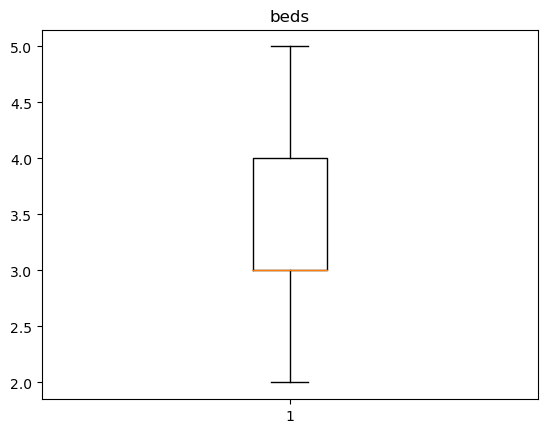

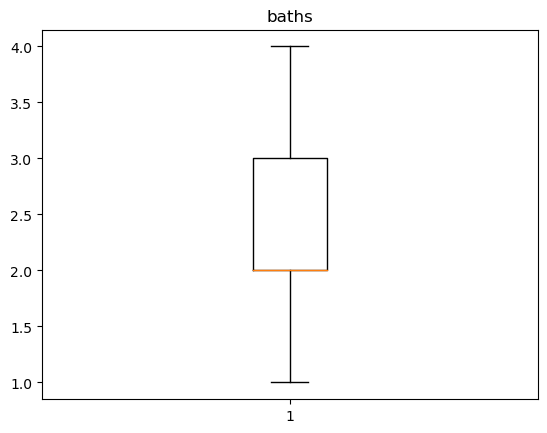

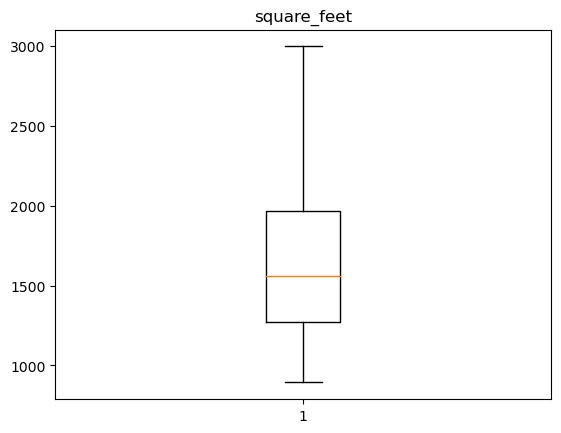

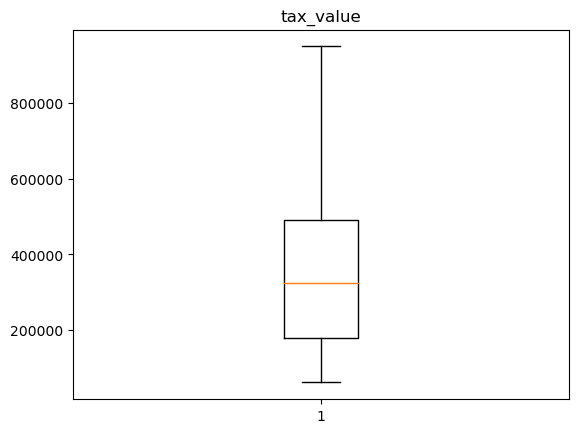

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

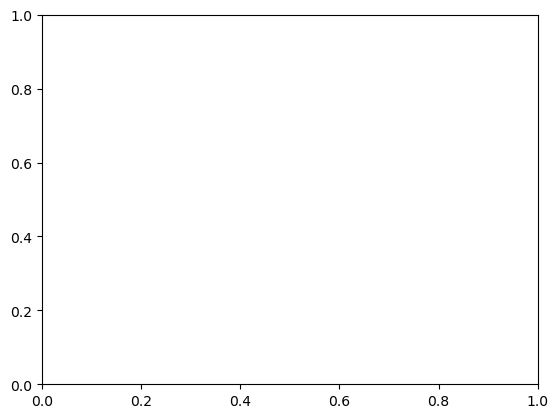

In [38]:
under_mill = df[df.tax_value < 950000]
under_mill_under_three = under_mill[df.square_feet < 3000]
for col in under_mill_under_three:
    plt.boxplot(under_mill_under_three[col])
    plt.title(col)
    plt.show()

In [30]:
df[df.tax_value < 1000000]

,beds,baths,square_feet,tax_value,county
2,3.0,2.0,1243.0,564778.0,Orange
3,4.0,3.0,2376.0,145143.0,Los Angeles
4,4.0,3.0,2962.0,773303.0,Los Angeles
6,4.0,3.0,3039.0,220583.0,Los Angeles
7,4.0,3.0,2540.0,430108.0,Los Angeles
...,...,...,...,...,...
52434,4.0,3.0,2068.0,332251.0,Los Angeles
52435,3.0,2.0,1570.0,72026.0,Los Angeles
52436,4.0,2.0,1633.0,346534.0,Los Angeles
52437,2.0,2.0,1286.0,354621.0,Los Angeles
